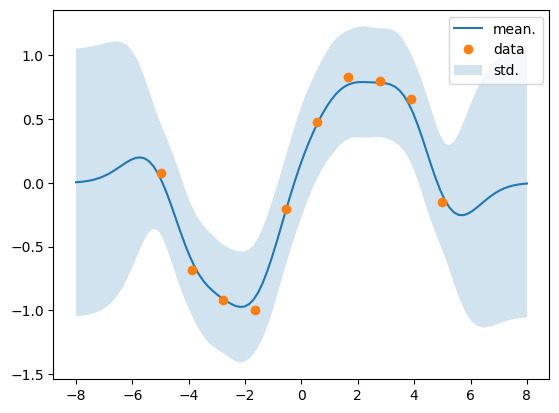

PyObject <matplotlib.legend.Legend object at 0x7fdac98b3dc0>

In [5]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = θ₁*exp(-0.5*inv(θ₂^2)*(x₁ - x₂)^2) + θ₃*(x₁==x₂) # Gaussian kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

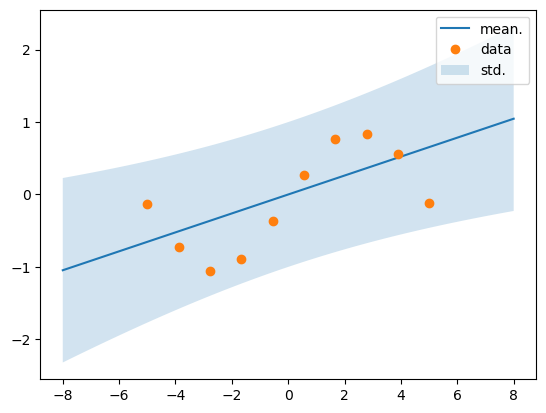

PyObject <matplotlib.legend.Legend object at 0x7fdb28571490>

In [36]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁ = (1.0)
k(x₁, x₂) = dot(x₁, x₂) + θ₁*(x₁==x₂) # Linear kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

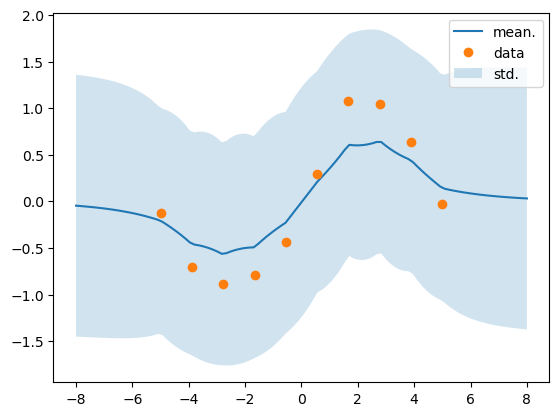

PyObject <matplotlib.legend.Legend object at 0x7ff9e8fc3190>

In [7]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = exp(-0.5*inv(θ₁)*abs.(x₁ - x₂)) + θ₂*(x₁==x₂)  # Exponential kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

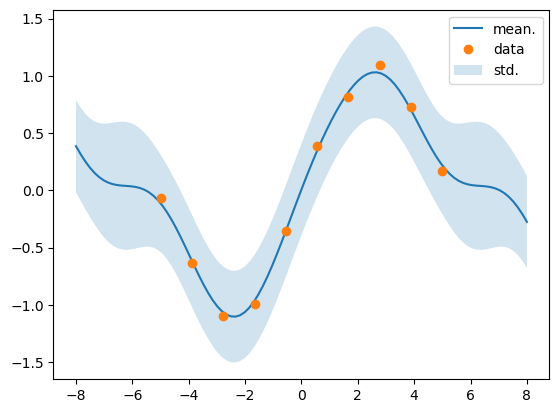

PyObject <matplotlib.legend.Legend object at 0x7ffa19cb5250>

In [8]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃ = (1.0, 1.0, 0.1)
k(x₁, x₂) = exp(θ₁*cos(0.5*inv(θ₂)*abs.(x₁ - x₂))) + θ₃*(x₁==x₂)  # Periodic kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

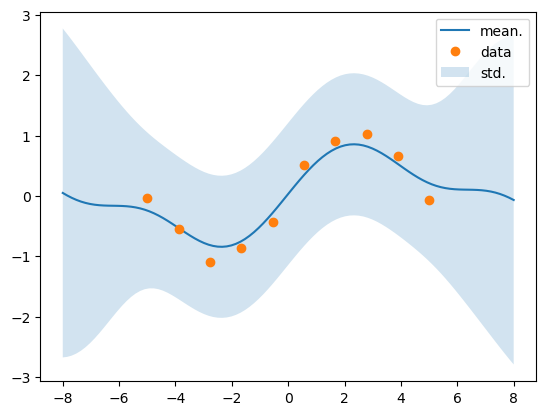

PyObject <matplotlib.legend.Legend object at 0x7ff9a8118b80>

In [9]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Model
θ₁, θ₂, θ₃, θ₄, θ₅ = (1.0, 1.0, 1.0, 1.0, 1.0)
k(x₁, x₂) = θ₁*dot(x₁, x₂) + θ₂*exp(θ₃*cos(0.5*inv(θ₄)*abs.(x₁ - x₂))) + θ₅*(x₁==x₂) # Linear kernel + Periodic kernel

# Training
invKᵗᵗ = inv(k.(Xᵗ, Xᵗ'))

# Prediction
Kᵖᵖ, Kᵖᵗ = (k.(Xᵖ, Xᵖ'), k.(Xᵖ, Xᵗ'))
μᵖ, Σᵖ = (Kᵖᵗ*invKᵗᵗ*Yᵗ, Kᵖᵖ - Kᵖᵗ*invKᵗᵗ*Kᵖᵗ')

# Plot
using PyPlot, LinearAlgebra
plot(Xᵖ, μᵖ, label="mean.")
fill_between(Xᵖ, μᵖ+sqrt.(diag(Σᵖ)), μᵖ-sqrt.(diag(Σᵖ)),
             label="std.", alpha=0.2)
plot(Xᵗ, Yᵗ, "o", label="data")
legend()

In [37]:
x = rand(5)
y = 1

f(x, y) = (sum(sin,x)) .+ prod(tan,x) * sum(sqrt,x) * y

using ForwardDiff, Optim
grad1(x, y) = ForwardDiff.gradient(x -> f(x,y), x)
grad2(x, y) = ForwardDiff.derivative(y -> f(x,y), y)
println("∂f∂x :", grad1(x, y))
println("∂f∂y :", grad2(x, y))

∂f∂x :[7.185385296529613, 7.754416225270344, 8.898518322253526, 7.416356756871499, 7.3557117178919444]
∂f∂y :3.037061146351213


In [38]:
using Optim
f(x) = x[1]^2+x[2]^2
opt = optimize(f, [1.0,2.0])
opt.minimizer

2-element Array{Float64,1}:
 -7.0218528416655e-5
 -2.9091278339724082e-5

In [40]:
# Train dataset
Xᵗ = range(-5, 5, length=10)
Yᵗ = sin.(2pi*Xᵗ ./10) + 0.1*randn(10)

# Test dataset
Xᵖ = range(-8, 8, length=100)

# Hyperparameter
θ = log(1.0)
k(x₁, x₂, θ) = θ*exp(-0.5*inv(1.0^2)*(x₁-x₂)^2) + 1.0*(x₁==x₂) # Gaussian kernel

using ForwardDiff
∂k∂θ(x₁,x₂,θ) = ForwardDiff.derivative(θ -> k.(x₁,x₂,θ), θ)
println("∂k∂θ :", ∂k∂θ(Xᵗ, Xᵗ', θ))

∂k∂θ :[1.0 0.5394075072376265 0.08465798862252993 0.003865920139472811 5.136553118975938e-5 1.9857504150120976e-7 2.2336314362031582e-10 7.310251818545068e-14 6.961248457838979e-18 1.9287498479639178e-22; 0.5394075072376265 1.0 0.5394075072376265 0.08465798862252993 0.003865920139472811 5.136553118975938e-5 1.9857504150120976e-7 2.233631436203174e-10 7.310251818545068e-14 6.961248457838979e-18; 0.08465798862252993 0.5394075072376265 1.0 0.5394075072376268 0.08465798862252993 0.003865920139472811 5.136553118975938e-5 1.9857504150120976e-7 2.233631436203174e-10 7.310251818545068e-14; 0.003865920139472811 0.08465798862252993 0.5394075072376268 1.0 0.5394075072376265 0.08465798862252993 0.003865920139472804 5.136553118975938e-5 1.9857504150120976e-7 2.2336314362031582e-10; 5.136553118975938e-5 0.003865920139472811 0.08465798862252993 0.5394075072376265 1.0 0.5394075072376265 0.08465798862252993 0.003865920139472811 5.136553118975938e-5 1.9857504150120976e-7; 1.9857504150120976e-7 5.1365531

In [29]:
Xᵗ = range(-5, 5, length=10)

Xᵗ'

1×10 LinearAlgebra.Adjoint{Float64,StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}:
 -5.0  -3.88889  -2.77778  -1.66667  …  1.66667  2.77778  3.88889  5.0